In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# import lightgbm as lgb

pd.set_option('display.max_columns',15)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [6]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [8]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [10]:
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:xlabel='Item_Weight'>

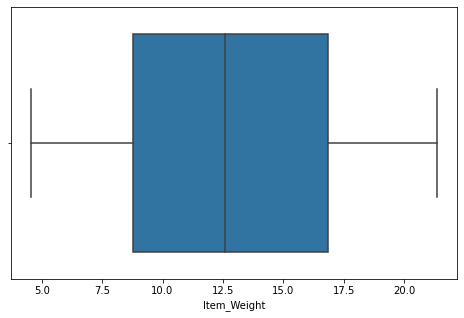

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=df_train)

<AxesSubplot:xlabel='Item_Weight'>

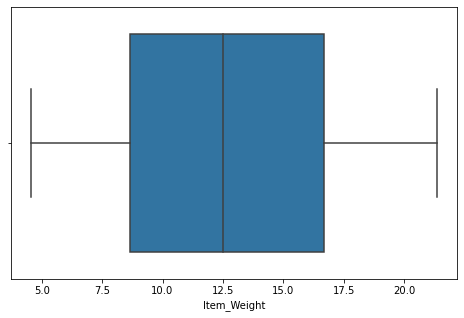

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=df_test)

In [22]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

In [25]:
df_train['Item_Weight'].isnull().sum(), df_test['Item_Weight'].isnull().sum()

(0, 0)

In [28]:
df_train['Outlet_Size'].value_counts(), df_test['Outlet_Size'].value_counts()

(Medium    2793
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Medium    1862
 Small     1592
 High       621
 Name: Outlet_Size, dtype: int64)

In [29]:
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [30]:
df_train['Outlet_Size'].isnull().sum(), df_test['Outlet_Size'].isnull().sum()

(0, 0)

In [32]:
df_train['Item_Fat_Content'].value_counts(), df_test['Item_Fat_Content'].value_counts()

(Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Low Fat    3396
 Regular    1935
 LF          206
 reg          78
 low fat      66
 Name: Item_Fat_Content, dtype: int64)

In [33]:
df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
df_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [34]:
df_train['Item_Fat_Content'].value_counts(), df_test['Item_Fat_Content'].value_counts()

(Low Fat    5517
 Regular    3006
 Name: Item_Fat_Content, dtype: int64,
 Low Fat    3668
 Regular    2013
 Name: Item_Fat_Content, dtype: int64)

In [35]:
df_train['Years_Established'] = df_train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 
df_test['Years_Established'] = df_test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [36]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [37]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].astype(str)

In [38]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].astype(str)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

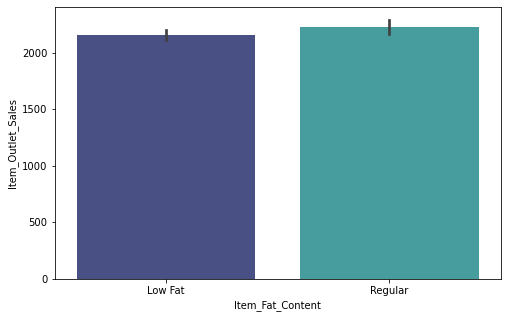

In [39]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=df_train,palette='mako')

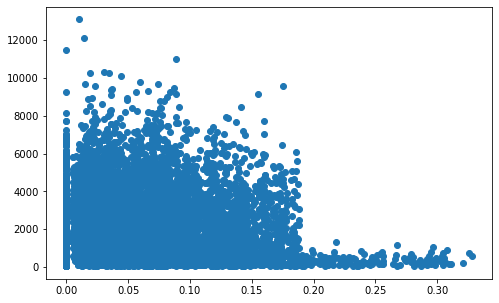

In [40]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df_train)

In [41]:
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0,df_train['Item_Visibility'].mean())
df_test['Item_Visibility']= df_test['Item_Visibility'].replace(0,df_test['Item_Visibility'].mean())

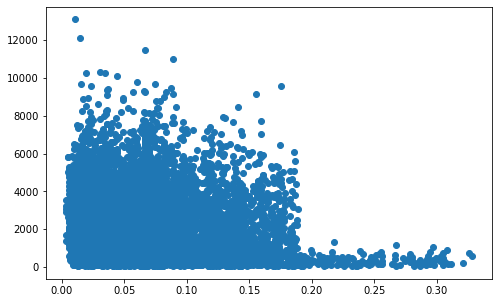

In [42]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df_train)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

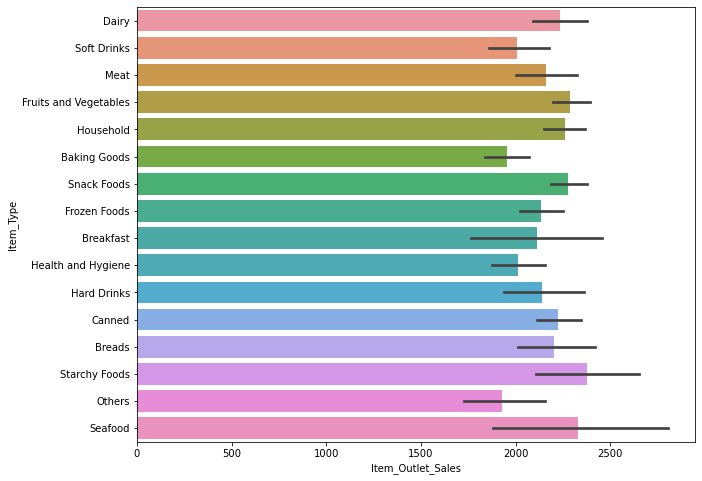

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df_train)

Text(0, 0.5, 'Item Outlet Sales')

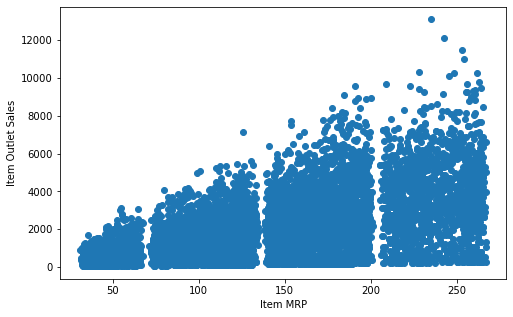

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=df_train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

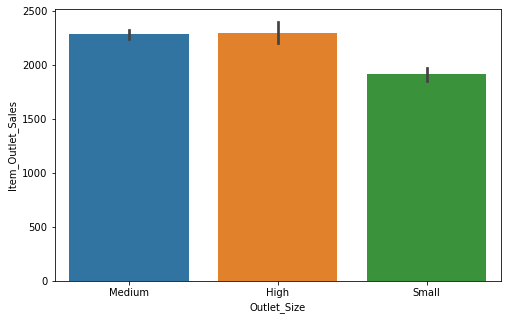

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df_train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

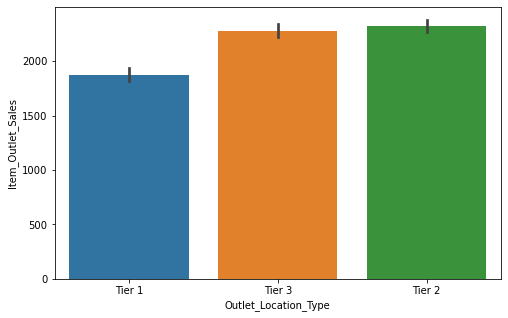

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df_train)

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

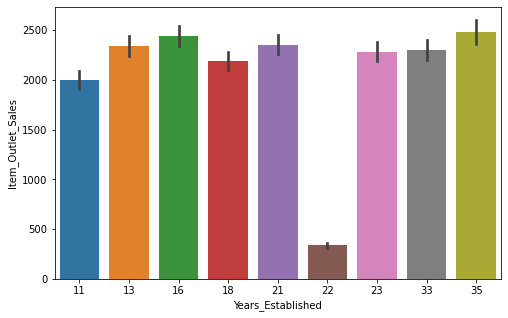

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=df_train)

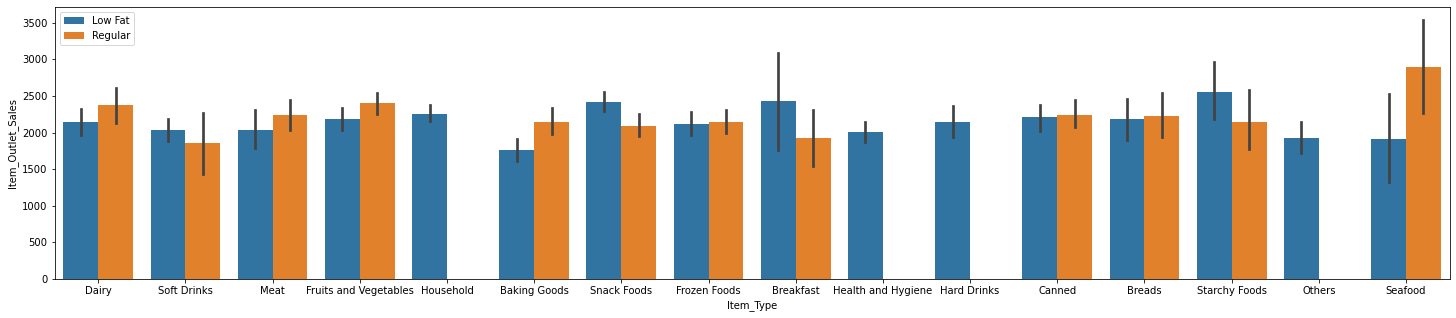

In [50]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df_train)
plt.legend()

In [51]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])
    
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

In [53]:
df_train[:10]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.300000,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,21
1,DRC01,5.920000,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,11
2,FDN15,17.500000,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,21
3,FDX07,19.200000,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800,22
4,NCD19,8.930000,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,33
5,FDP36,10.395000,1,0.066132,0,51.4008,OUT018,2009,1,2,2,556.6088,11
6,FDO10,13.650000,1,0.012741,13,57.6588,OUT013,1987,0,2,1,343.5528,33
7,FDP10,12.857645,0,0.127470,13,107.7622,OUT027,1985,1,2,3,4022.7636,35
8,FDH17,16.200000,1,0.016687,5,96.9726,OUT045,2002,1,1,1,1076.5986,18
9,FDU28,19.200000,1,0.094450,5,187.8214,OUT017,2007,1,1,1,4710.5350,13


In [55]:
df_train = df_train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
df_test= df_test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [58]:
df_train[:10]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.300000,0,0.016047,4,249.8092,1,0,1,3735.1380,21
1,5.920000,1,0.019278,14,48.2692,1,2,2,443.4228,11
2,17.500000,0,0.016760,10,141.6180,1,0,1,2097.2700,21
3,19.200000,1,0.066132,6,182.0950,1,2,0,732.3800,22
4,8.930000,0,0.066132,9,53.8614,0,2,1,994.7052,33
5,10.395000,1,0.066132,0,51.4008,1,2,2,556.6088,11
6,13.650000,1,0.012741,13,57.6588,0,2,1,343.5528,33
7,12.857645,0,0.127470,13,107.7622,1,2,3,4022.7636,35
8,16.200000,1,0.016687,5,96.9726,1,1,1,1076.5986,18
9,19.200000,1,0.094450,5,187.8214,1,1,1,4710.5350,13


In [59]:
df_test.shape[0]

5681

In [152]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

Y = df_train['Item_Outlet_Sales']
feats = ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']
X = df_train[feats]

In [176]:
# sub_preds = np.zeros(df_test.shape[0])

trn_x, val_x, trn_y, val_y = train_test_split(X, Y, test_size=0.1, random_state=42) 
feature_importance_df = pd.DataFrame() 

dtr = DecisionTreeRegressor(max_depth=9,min_samples_leaf=150, random_state=22)
    
# clf = LGBMClassifier(n_estimators=10000,learning_rate=0.10,num_leaves=30,subsample=.9,max_depth=7,reg_alpha=.1,reg_lambda=.1,min_split_gain=.01,min_child_weight=2,silent=-1,verbose=-1,)
        
dtr.fit(trn_x,trn_y)

sub_preds = dtr.predict(val_x)
        
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = dtr.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

In [177]:
dtr.score(val_x,val_y)

0.6155057880241049

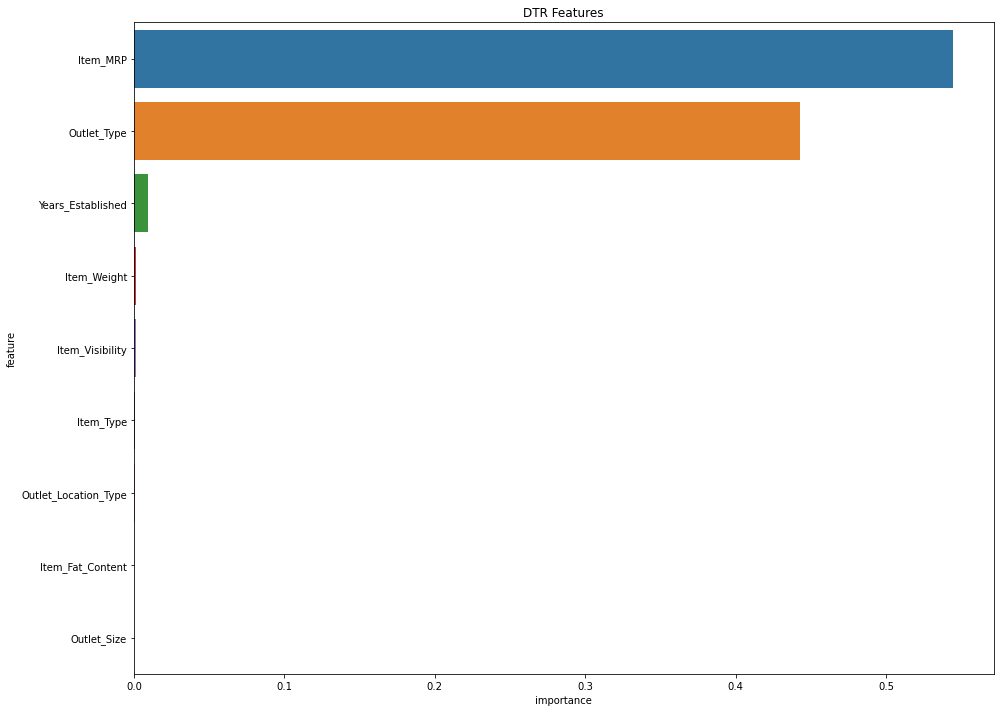

In [178]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('DTR Features')
plt.tight_layout()

In [236]:
from sklearn.model_selection  import cross_val_score
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [241]:
cross_val(dtr,DecisionTreeRegressor(),X,Y,5)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=150, random_state=22) Scores:
0.23
0.13
0.07
0.17
0.18
Average DecisionTreeRegressor(max_depth=9, min_samples_leaf=150, random_state=22) score: 0.15


In [204]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),n_estimators=500, learning_rate=0.001, random_state=22)
ada.fit(trn_x,trn_y)
sub_preds1 = ada.predict(val_x)
feature_importance_df1 = pd.DataFrame()
fold_importance_df1 = pd.DataFrame()
fold_importance_df1["feature"] = feats
fold_importance_df1["importance"] = ada.feature_importances_
feature_importance_df1 = pd.concat([feature_importance_df1, fold_importance_df1], axis=0)

In [205]:
ada.score(val_x,val_y)

0.6171924629651433

Text(0.5, 1.0, 'AdaBoost Features')

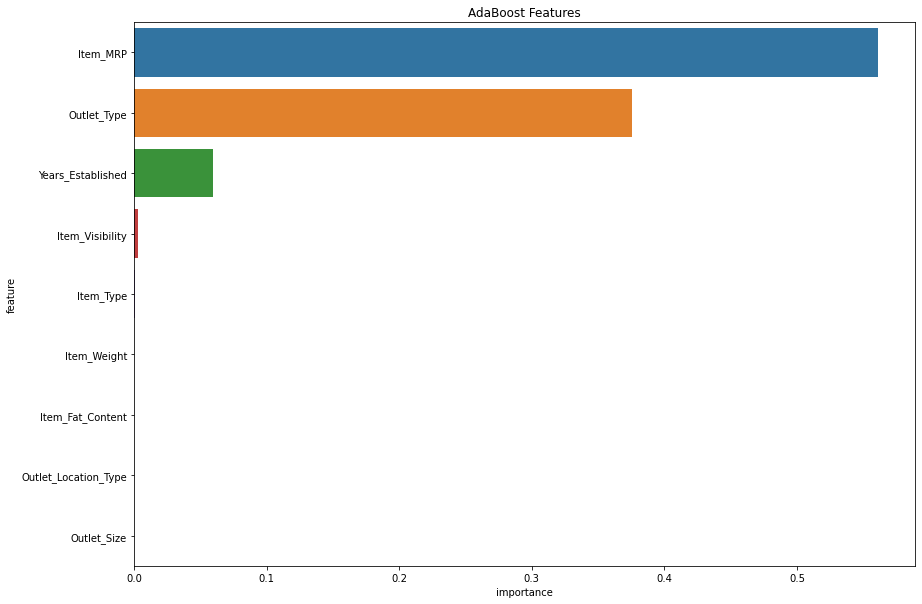

In [207]:
cols = feature_importance_df1[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index

best_features = feature_importance_df1.loc[feature_importance_df1.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('AdaBoost Features')

In [242]:
cross_val(ada,AdaBoostRegressor(),X,Y,10)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.001, n_estimators=500, random_state=22) Scores:
0.5
0.49
0.45
0.51
0.43
0.5
0.56
0.52
0.55
0.5
Average AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.001, n_estimators=500, random_state=22) score: 0.5


In [224]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=300,max_depth=10, min_samples_leaf=100,n_jobs=4,random_state=22, verbose=-1)

RF.fit(trn_x,trn_y)
sub_preds2 = RF.predict(val_x)
feature_importance_df2 = pd.DataFrame()
fold_importance_df2 = pd.DataFrame()
fold_importance_df2["feature"] = feats
fold_importance_df2["importance"] = RF.feature_importances_
feature_importance_df2 = pd.concat([feature_importance_df2, fold_importance_df2], axis=0)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished


In [225]:
RF.score(val_x,val_y)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.1s finished


0.6253330302688165

Text(0.5, 1.0, 'AdaBoost Features')

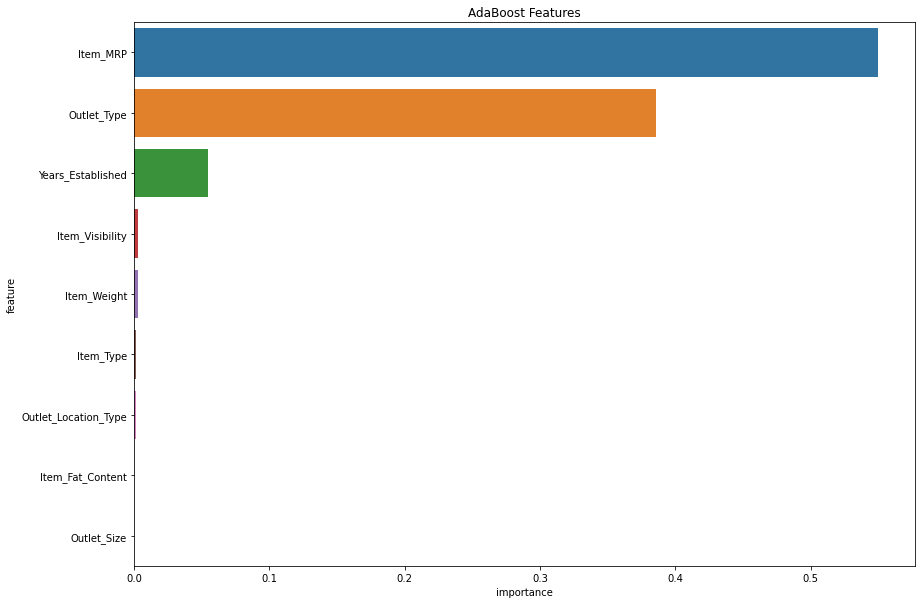

In [226]:
cols = feature_importance_df2[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index

best_features = feature_importance_df2.loc[feature_importance_df2.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('AdaBoost Features')

In [244]:
cross_val(RF,RandomForestRegressor(),X,Y,5)

RandomForestRegressor(max_depth=10, min_samples_leaf=100, n_estimators=300,
                      n_jobs=4, random_state=22, verbose=-1) Scores:
0.57
0.52
0.52
0.55
0.57
Average RandomForestRegressor(max_depth=10, min_samples_leaf=100, n_estimators=300,
                      n_jobs=4, random_state=22, verbose=-1) score: 0.55


In [231]:
LR = LinearRegression(normalize=True)
LR.fit(trn_x,trn_y)
sub_preds3 = LR.predict(val_x)
feature_importance_df3 = pd.DataFrame()
fold_importance_df3 = pd.DataFrame()
fold_importance_df3["feature"] = feats
fold_importance_df3["importance"] = RF.feature_importances_
feature_importance_df3 = pd.concat([feature_importance_df3, fold_importance_df3], axis=0)

In [233]:
LR.score(val_x,val_y)

0.5309791442288767

In [246]:
cross_val(LR,LinearRegression(),X,Y,5)

LinearRegression(normalize=True) Scores:
0.53
0.5
0.49
0.51
0.51
Average LinearRegression(normalize=True) score: 0.51


Text(0.5, 1.0, 'AdaBoost Features')

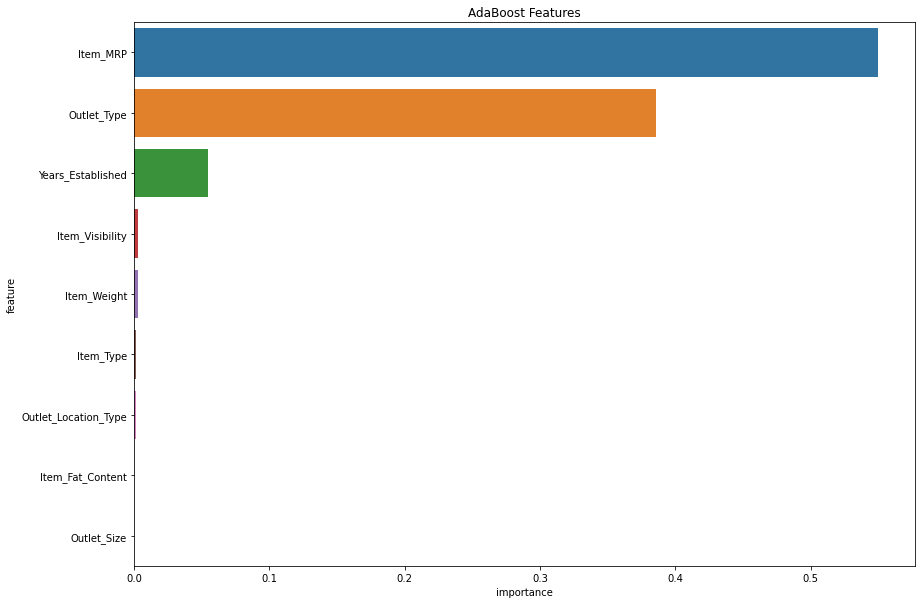

In [248]:
cols = feature_importance_df3[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index

best_features = feature_importance_df3.loc[feature_importance_df3.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('AdaBoost Features')